In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as K
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
%matplotlib inline

Loading the full MNIST dataset.

In [4]:
mnist = tf.keras.datasets.mnist
(X, y), (X_test, y_test) = mnist.load_data()

Normalizing the pixel values.

In [5]:
X = X / 255.0
X_test = X_test / 255.0

We combine the original train and test sets and then apply a custom train_test_split.
Also, we flatten the images for scikit-learn compatibility if necessary.

In [6]:
import numpy as np
X = X.reshape((X.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))
all_X = np.concatenate((X, X_test), axis=0)
all_y = np.concatenate((y, y_test), axis=0)

We split the data into train and test datasets.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, test_size=0.25, shuffle=True, random_state=42)
print("Train/test split applied.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train/test split applied.
Training set size: 52500
Test set size: 17500


Defining the model.

In [15]:
rf_model = RandomForestClassifier(max_features=12, random_state=42)

Fitting the model with the training data.

In [16]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=12, random_state=42)

Getting the target prediction on the training dataset.

In [18]:
y_train_pred = rf_model.predict(X_train)

Getting the target prediction on the test dataset.

In [19]:
y_test_pred = rf_model.predict(X_test)

With this information, we construct the confusion matrix.

In [26]:
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test,y_test_pred)
print(conf_matrix)

Confusion Matrix:
[[1686    0    6    0    1    3    7    1    9    1]
 [   0 1953    8    6    2    1    0    4    2    1]
 [   5    3 1707    7    7    1   11    9   10    1]
 [   1    0   28 1707    2   16    3   15   18   16]
 [   2    1    6    0 1539    0    5    4    2   28]
 [   4    4    3   33    5 1525   15    3   12    3]
 [   5    1    0    0    9    9 1736    0    1    0]
 [   2    7   20    0    9    1    0 1814    1   24]
 [   3    7   10   21   15   15    8    4 1558   16]
 [  10   10    8   19   22    5    2   16   10 1650]]


We can visualize our confusion matrix.

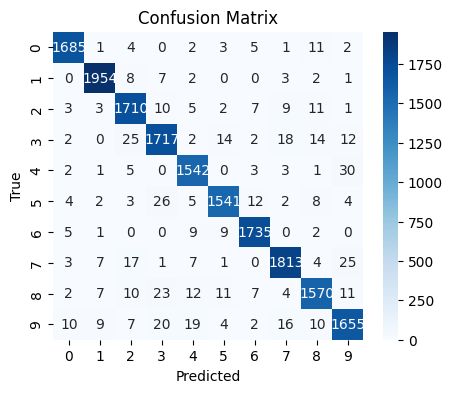

In [65]:
plt.figure(figsize=(5, 4))  # Define the dimension
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")  # Create heatmap
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix')
plt.show()  # Show the graph

Looking at the average accuracy of the model on the test data.

In [21]:
print('Average accuracy of the model:')
print(rf_model.score(X_test,y_test)) 

Average accuracy of the model:
0.9642857142857143


Showing wrong images with wrong classification.

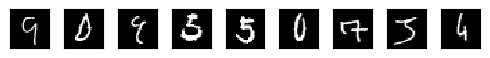

In [67]:
plt.figure(figsize=(5,1))
j = 0
for i in range(9):
  while y_test[j] == y_test_pred[j]:
    j = j+1
  ax = plt.subplot(1, 9, i+1)
  plt.imshow(X_test[j,:].reshape(28,28), interpolation="nearest", 
                   vmin=0, vmax=1)
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  j = j+1
plt.tight_layout()

Defining the model with 200 trees.

In [35]:
rf_model_200 = RandomForestClassifier(n_estimators=200, max_features=12, random_state=42)

Fitting the model with the training data.

In [36]:
rf_model_200.fit(X_train, y_train)

RandomForestClassifier(max_features=12, n_estimators=200, random_state=42)

Predicting and evaluating the model with 200 trees.

In [37]:
y_pred_200 = rf_model_200.predict(X_test)
accuracy_200 = accuracy_score(y_test, y_pred_200)
print(f"Accuracy of the model with 200 trees: {accuracy_200}")

Accuracy of the model with 200 trees: 0.9672


Visualizing the confusion matrix for '200 trees' model.

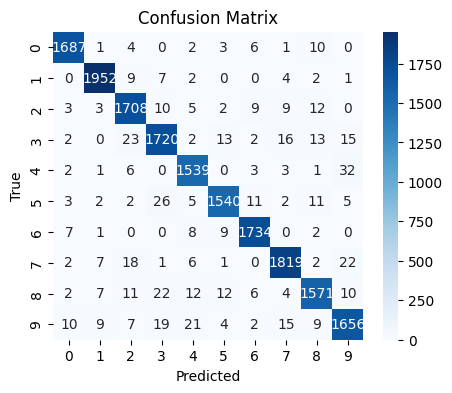

In [68]:
conf_matrix = confusion_matrix(y_test,y_pred_200)
plt.figure(figsize=(5, 4))  # Define the dimension
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")  # Create heatmap
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix')
plt.show()  # Show the graph

Defining the model with 300 trees.

In [39]:
rf_model_300 = RandomForestClassifier(n_estimators=300, max_features=12, random_state=42)

Fitting the model with the training data.

In [40]:
rf_model_300.fit(X_train, y_train)

RandomForestClassifier(max_features=12, n_estimators=300, random_state=42)

Predicting and evaluating this model.

In [42]:
y_pred_300 = rf_model_300.predict(X_test)
accuracy_300 = accuracy_score(y_test, y_pred_300)
print(f"Accuracy of the model with 300 trees: {accuracy_300}")

Accuracy of the model with 300 trees: 0.9669714285714286


Visualizing the confusion matrix for this model.

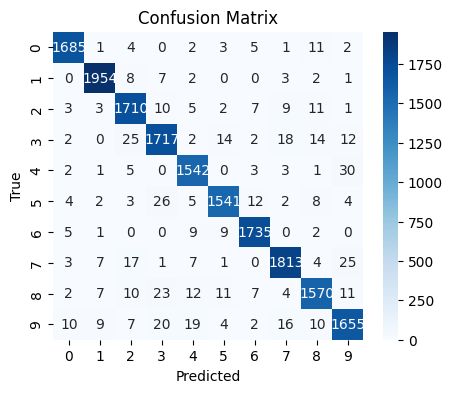

In [69]:
conf_matrix = confusion_matrix(y_test,y_pred_300)
plt.figure(figsize=(5, 4))  # Define the dimension
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")  # Create heatmap
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix')
plt.show()  # Show the graph

To get better result, we use GridSearchCV and try with many different combinations of some parameters in this sense.

In [54]:
from sklearn.model_selection import GridSearchCV

# Defining the parameters
parameter_grid = {
    'n_estimators': [100, 400, 500], # Number of trees
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 3, 4, 5], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],   # Minimum number of samples required at each leaf node
    'max_features': [12]   # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV with the RandomForestClassifier and the defined parameter grid
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=parameter_grid, cv=2, n_jobs=-1, scoring='accuracy')

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Printing the best parameters and the best score obtained from the grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Retrieving the best model from grid search
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 20, 'max_features': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Score: 0.9624190476190476


Instead of giving all the combinations a try, we can use RandomizedSearchCV to get a more computationally approach (it is more useful for large datasets like MNIST)

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.metrics import make_scorer, accuracy_score
import joblib

Custom score function for evaluating the models (for example, accuracy score)

In [56]:
scorer = make_scorer(accuracy_score)

In the RandomizedSearchCV, we define the paraameter distribution rather that a parameter grid

In [57]:
parameter_dist = {
    #range for the number of estimators
    'n_estimators':sp_randint(100,500),
    #range of depth values to explore
    'max_depth':sp_randint(3,20),
    #continuous distributions for minimum samples split and leaf
    'min_samples_split':uniform(0.01,0.1),
    'min_samples_leaf':uniform(0.01,0.1),
    #number of features considered for splitting
    'max_features':['sqrt','log2'], #square root and log of the number of the features (None would be for all the features)
    #method of selecting samples for training each tree
    'bootstrap':[True,False]
}

Initializing the Random Forest model.

In [58]:
rf_model = RandomForestClassifier(random_state=42)

Initializing RandomizedSearchCV with the desired parameters and specified distributions.

In [61]:
random_search = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions = parameter_dist,
    n_iter = 15, #number of parameter settings that are sampled
    cv = 2, #3-fold cross-validation
    scoring = scorer, #scoring method
    random_state = 42,
    verbose = 2, #higher number for more detailed output
    n_jobs = -1 #using all available cores 
)

Fitting RandomizedSearchCV to the training dataset (this step can save time compared to GridSearchCV by evaluating a subset of the hyperparameters).

In [62]:
random_search.fit(X_train,y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D89DB46120>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D89DB44EC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001D89DB44440>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D89DB47A10>},
                   random_state=42,
                   scoring=make_scorer(accuracy_score, response_method='predict'),
                   verbose=2)

Printing the best parameters and the best score achieved during the search

In [63]:
print('Best Parameters:',random_search.best_params_)
print('Best Score:',random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 0.029967378215835977, 'min_samples_split': 0.06142344384136116, 'n_estimators': 419}
Best Score: 0.8373333333333333


Saving the best model to a file (for later use).

In [64]:
joblib.dump(random_search.best_estimator_,'best_random_forest_model_for_mnist_data.pkl')

['best_random_forest_model_for_mnist_data.pkl']